In [1]:
import os
import dotenv
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

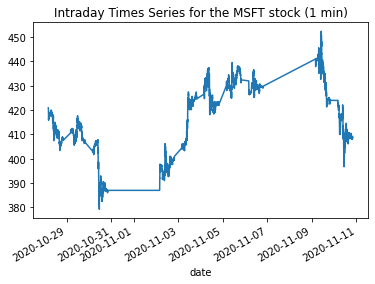

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-11-10 20:00:00,408.50,409.00,408.50,409.00,3276.0
2020-11-10 19:59:00,408.60,408.65,408.60,408.65,950.0
2020-11-10 19:58:00,408.72,408.72,408.58,408.58,2056.0
2020-11-10 19:57:00,408.85,408.89,408.63,408.75,2193.0
2020-11-10 19:56:00,408.75,408.79,408.75,408.79,834.0
...,...,...,...,...,...
2020-10-28 04:09:00,419.75,419.75,419.75,419.75,378.0
2020-10-28 04:08:00,420.32,420.32,420.00,420.00,1649.0
2020-10-28 04:07:00,420.60,420.60,420.60,420.60,546.0


In [2]:
API_KEY = os.environ["ALPHA_VANTAGE_API_KEY"] # Your alpha vantage api key goes here
ts = TimeSeries(key=API_KEY, output_format='pandas')

data, meta_data = ts.get_intraday(symbol='TSLA',interval='1min', outputsize='full')
data['4. close'].plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.show()
data

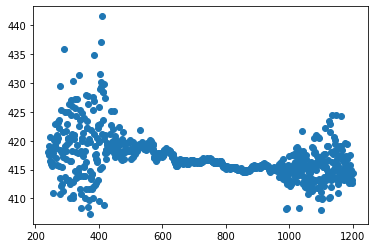

In [3]:
close = data['4. close'].copy()
close.index = 60 * close.index.hour + close.index.minute
close = close.reset_index()

min_mean = close.groupby('date').mean()

plt.scatter(min_mean.index, min_mean)